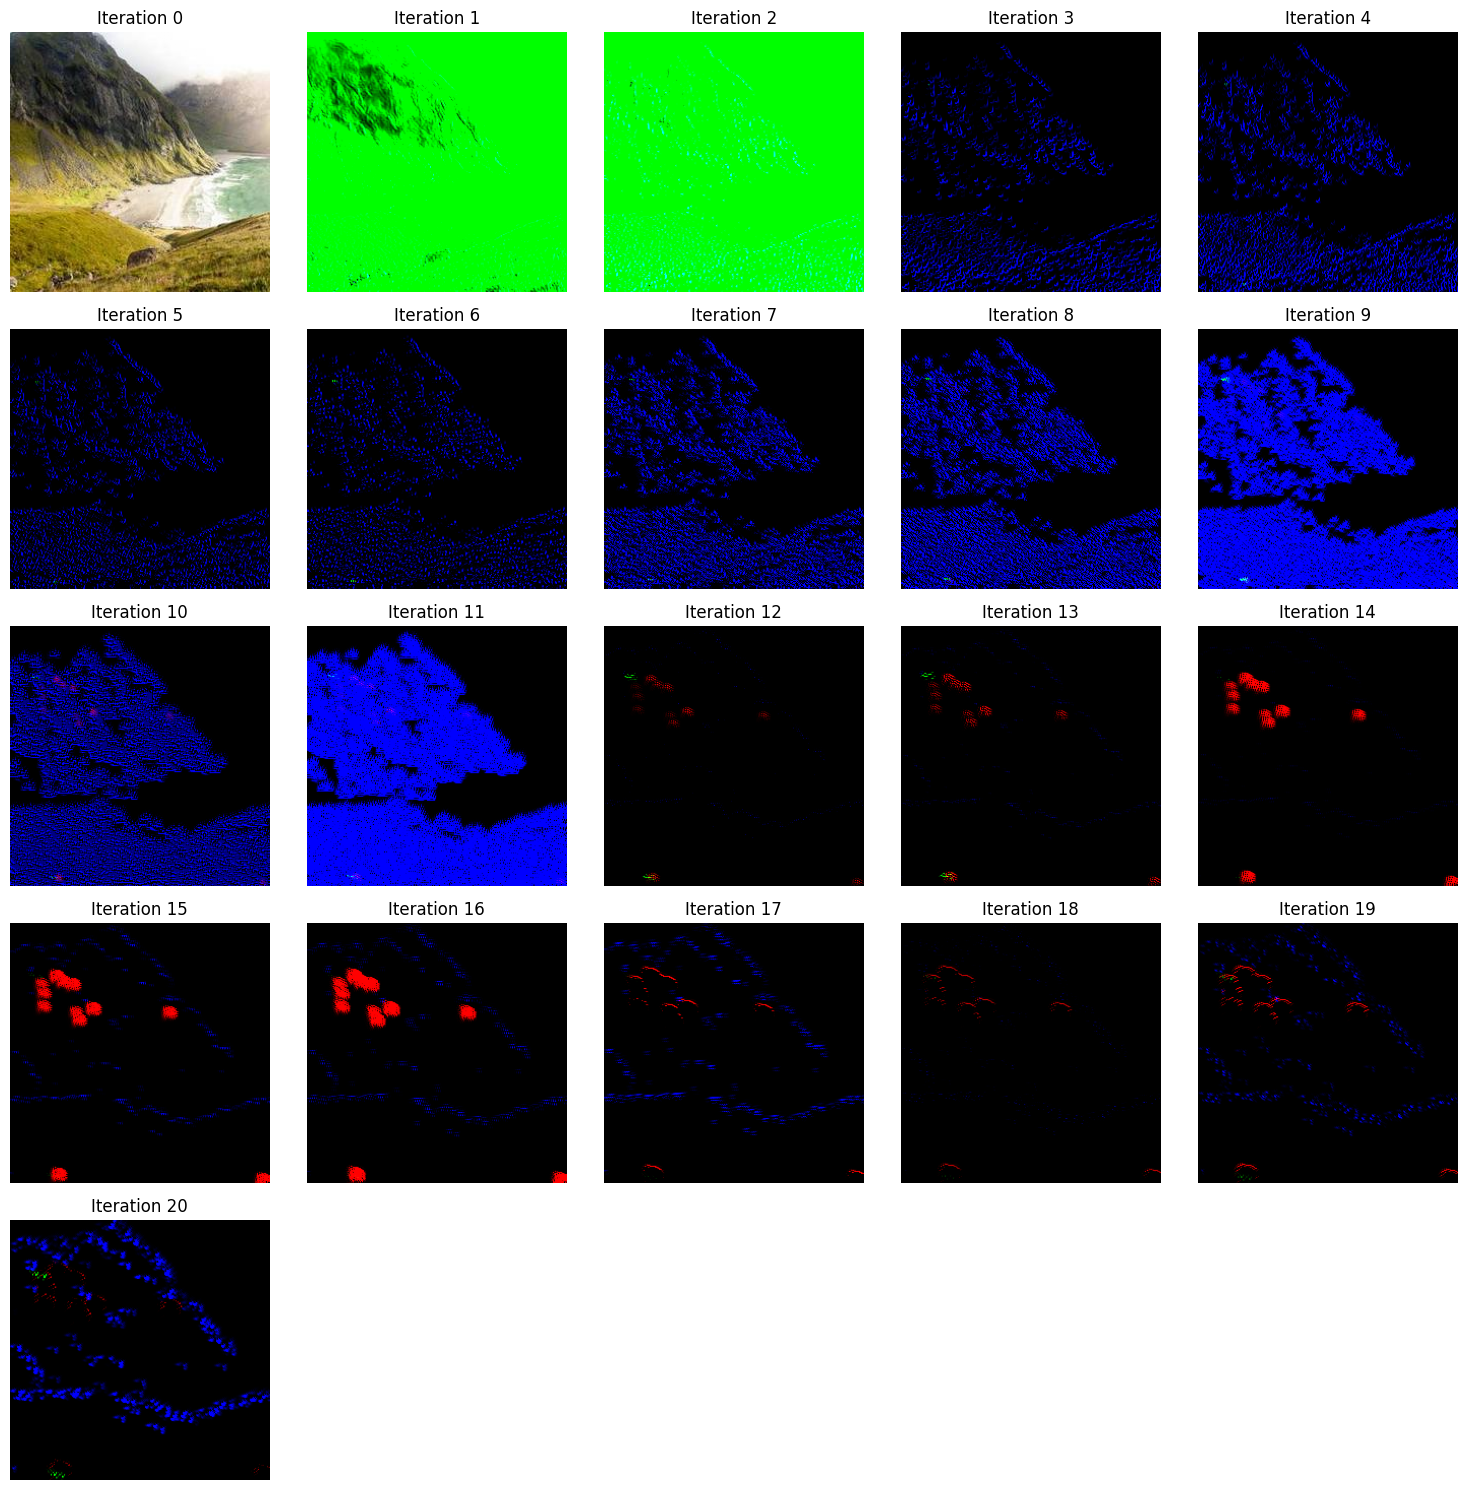

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Load a random image
url = "https://picsum.photos/256/256"  # smaller size for easier visualization
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert("RGB")
image_np = np.array(image).astype(np.float32) / 255.0

# Function to apply random 3x3 convolution with padding
def apply_random_convolution(image, iterations):
    output = image.copy()
    frames = [output.copy()]
    for _ in range(iterations):
        random_kernel = np.random.randn(3, 3, 3)
        result = np.zeros_like(output)
        for c in range(3):
            result[:, :, c] = cv2.filter2D(output[:, :, c], -1, random_kernel[:, :, c], borderType=cv2.BORDER_REFLECT)
        output = np.clip(result, 0, 1)
        frames.append(output.copy())
    return frames

# Run the convolution
num_iterations = 20  # You can increase this
frames = apply_random_convolution(image_np, num_iterations)

# Plot all frames
cols = 5
rows = int(np.ceil(len(frames) / cols))
plt.figure(figsize=(15, 3 * rows))

for i, frame in enumerate(frames):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(frame)
    plt.title(f"Iteration {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()


[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]
[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]
[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]
[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]
[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]
[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]
[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]
[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]
[[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.

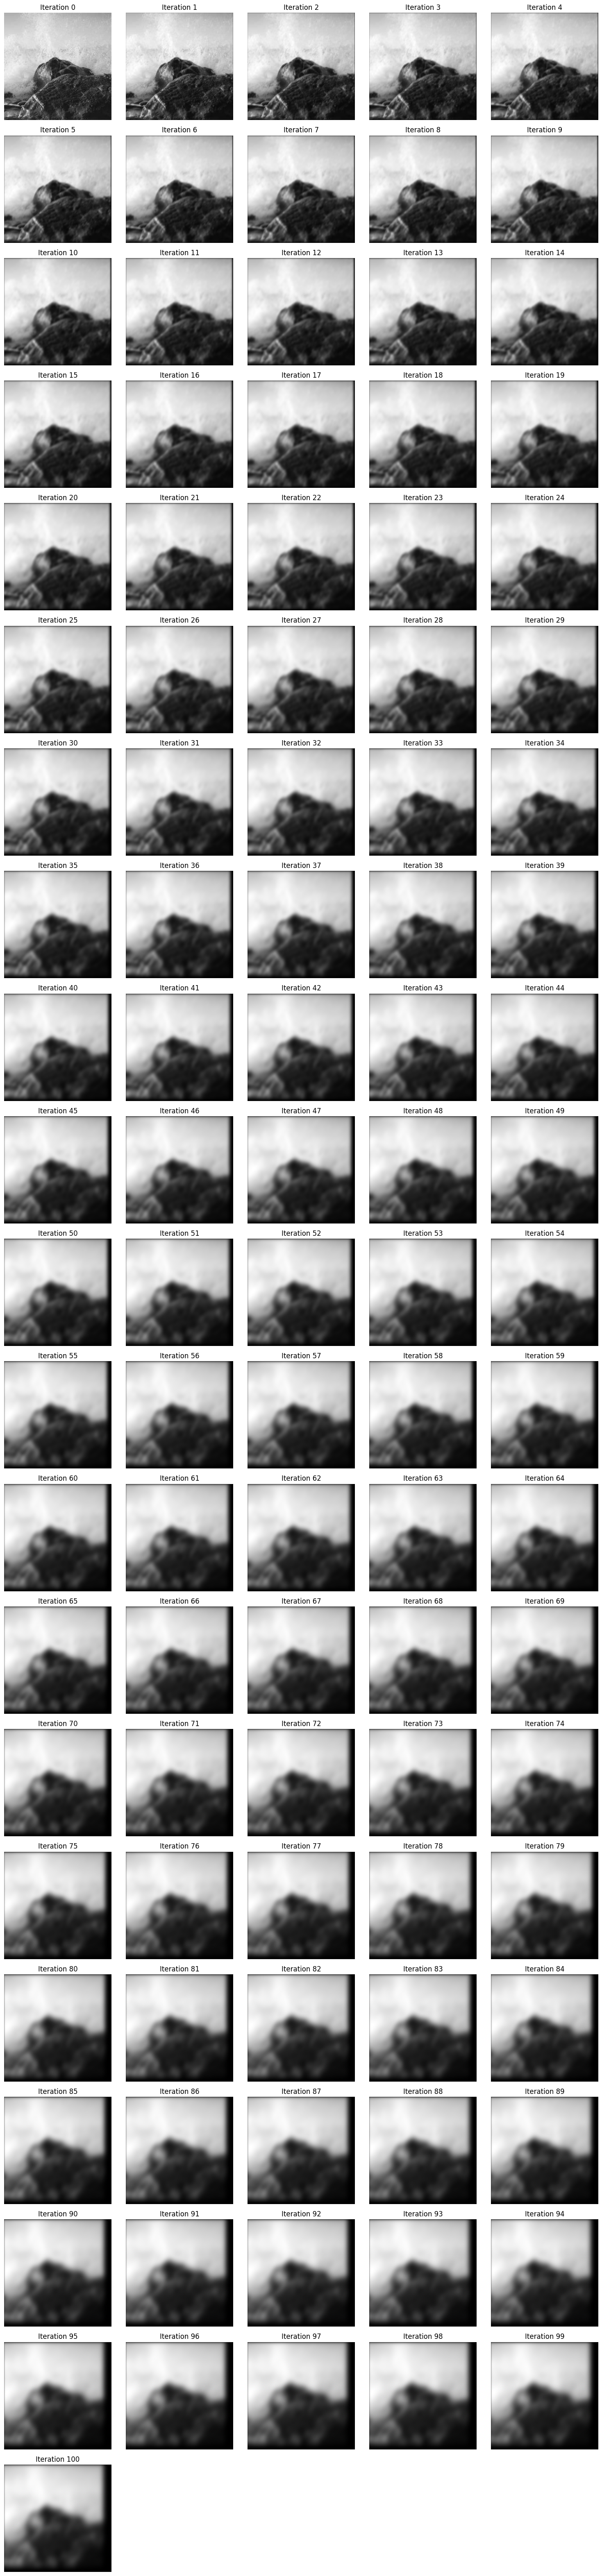

Random kernel used:
 [[ 0.42423194  0.03461838  0.51653842]
 [ 0.11099155  1.11274104  1.13563718]
 [-0.05564014  1.72866223 -0.26348942]]


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Load a random grayscale image
# url = "https://picsum.photos/256/256?grayscale"  # grayscale version
# response = requests.get(url)
# image = Image.open(BytesIO(response.content)).convert("L")  # 'L' mode = grayscale
# image_np = np.array(image).astype(np.float32) / 255.0

# Function to apply a single random 3x3 convolution filter
def apply_random_convolution_grayscale(image, iterations):
    output = image.copy()
    frames = [output.copy()]
    kernel = np.random.randn(3, 3)  # one kernel for all iterations
    for _ in range(iterations):
        print(kernel)
        output = cv2.filter2D(output, -1, kernel, borderType=cv2.BORDER_CONSTANT)
        output = output - output.min()
        if output.max() > 0:
            output = output / output.max()
        frames.append(output.copy())
    return frames, kernel

# Parameters
num_iterations = 100
frames, kernel_used = apply_random_convolution_grayscale(image_np, num_iterations)

# Plot results
cols = 5
rows = int(np.ceil(len(frames) / cols))
plt.figure(figsize=(15, 3 * rows))

for i, frame in enumerate(frames):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(frame, cmap='gray')
    plt.title(f"Iteration {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Print kernel used
print("Random kernel used:\n", kernel_used)
